In [12]:
from datetime import datetime
import time
import numpy as np
import pandas as pd
from pykrx import stock

In [2]:
latest_date = '20230206'

In [3]:
def get_stock_fundamental(date, ticker):
    # 펀더멘탈 정보 읽어 오기
    df_stock = stock.get_market_fundamental(date, date, ticker)
    # 인덱스 이름 제거
    df_stock.index.name = None
    # 인덱스를 티커로 변경
    df_stock.index = [ticker]
    # 이름 읽어 오기
    name = stock.get_market_ticker_name(ticker)
    # 첫 번째 열에 삽입하기
    df_stock.insert(0, 'Name', name)
    # 주식 데이터 리턴
    return df_stock

In [4]:
# 코스피 상장 주식을 시가총액 순으로 가져 오기
df_kospi = stock.get_market_cap(latest_date, market='KOSPI')

In [5]:
df_kospi.head()

,종가,시가총액,거래량,거래대금,상장주식수
티커,,,,,
005930,62200,371320474610000,9213963,576477295700,5969782550
373220,531000,124254000000000,185751,98076658000,234000000
000660,90100,65593013086500,1209784,109873803100,728002365
207940,811000,57722114000000,24275,19677960000,71174000
006400,709000,48754051770000,95516,67816070000,68764530


In [36]:
df_kospi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 944 entries, 005930 to 000547
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   종가      944 non-null    int64
 1   시가총액    944 non-null    int64
 2   거래량     944 non-null    int64
 3   거래대금    944 non-null    int64
 4   상장주식수   944 non-null    int64
dtypes: int64(5)
memory usage: 44.2+ KB


In [7]:
#시총 상위 200개 주가 펀더멘탈 정보 가져 오기
df_kospi_top_200 = None
start_time = time.time()
for idx, ticker in enumerate(df_kospi.head(200).index):
    print(f'{idx+1:03d}: {ticker}')
    df_stock_fundamental = get_stock_fundamental(latest_date, ticker)
    display(df_stock_fundamental)
    if df_kospi_top_200 is None:
        df_kospi_top_200 = df_stock_fundamental
    else:
        df_kospi_top_200 = pd.concat([df_kospi_top_200, df_stock_fundamental])
    time.sleep(1)
end_time = time.time()
print('')
print('')
print('*'*50)
print(f'소요 시간: {round(end_time - start_time)} seconds')
print('*'*50)

001: 005930


,Name,BPS,PER,PBR,EPS,DIV,DPS
005930,삼성전자,43611,10.78,1.43,5777,2.32,1444


002: 373220


,Name,BPS,PER,PBR,EPS,DIV,DPS
373220,LG에너지솔루션,39831,133.74,13.31,3963,0.0,0


003: 000660


,Name,BPS,PER,PBR,EPS,DIV,DPS
000660,SK하이닉스,90394,6.44,1.0,13989,1.71,1540


004: 207940


,Name,BPS,PER,PBR,EPS,DIV,DPS
207940,삼성바이오로직스,74551,137.95,10.88,5879,0.0,0


005: 006400


,Name,BPS,PER,PBR,EPS,DIV,DPS
006400,삼성SDI,219885,40.53,3.22,17492,0.14,1000


006: 051910


,Name,BPS,PER,PBR,EPS,DIV,DPS
051910,LG화학,278455,14.16,2.4,47108,1.8,12000


007: 005935


,Name,BPS,PER,PBR,EPS,DIV,DPS
005935,삼성전자우,0,0.0,0.0,0,2.58,1445


008: 005380


,Name,BPS,PER,PBR,EPS,DIV,DPS
005380,현대차,289609,9.07,0.59,18979,2.9,5000


009: 035420


,Name,BPS,PER,PBR,EPS,DIV,DPS
035420,NAVER,157641,1.98,1.39,110854,0.23,511


010: 035720


,Name,BPS,PER,PBR,EPS,DIV,DPS
035720,카카오,23018,20.46,2.86,3221,0.08,53


011: 000270


,Name,BPS,PER,PBR,EPS,DIV,DPS
000270,기아,87073,5.96,0.81,11874,4.24,3000


012: 005490


,Name,BPS,PER,PBR,EPS,DIV,DPS
005490,POSCO홀딩스,666803,3.44,0.45,87330,5.67,17000


013: 068270


,Name,BPS,PER,PBR,EPS,DIV,DPS
068270,셀트리온,27267,42.14,6.15,3982,0.45,750


014: 105560


,Name,BPS,PER,PBR,EPS,DIV,DPS
105560,KB금융,121808,5.04,0.46,11134,5.24,2940


015: 028260


,Name,BPS,PER,PBR,EPS,DIV,DPS
028260,삼성물산,184352,11.52,0.62,9913,3.68,4200


016: 055550


,Name,BPS,PER,PBR,EPS,DIV,DPS
055550,신한지주,88548,5.65,0.47,7308,4.75,1960


017: 012330


,Name,BPS,PER,PBR,EPS,DIV,DPS
012330,현대모비스,387397,8.05,0.53,25645,1.94,4000


018: 003670


,Name,BPS,PER,PBR,EPS,DIV,DPS
003670,포스코케미칼,30845,130.35,7.41,1753,0.13,300


019: 066570


,Name,BPS,PER,PBR,EPS,DIV,DPS
066570,LG전자,95691,17.94,1.07,5725,0.83,850


020: 096770


,Name,BPS,PER,PBR,EPS,DIV,DPS
096770,SK이노베이션,206117,47.23,0.83,3640,1.46,2508


021: 034730


,Name,BPS,PER,PBR,EPS,DIV,DPS
034730,SK,375047,5.32,0.53,37408,4.02,8000


022: 086790


,Name,BPS,PER,PBR,EPS,DIV,DPS
086790,하나금융지주,117363,4.07,0.41,11819,6.44,3100


023: 323410


,Name,BPS,PER,PBR,EPS,DIV,DPS
323410,카카오뱅크,11620,60.81,2.44,467,0.0,0


024: 032830


,Name,BPS,PER,PBR,EPS,DIV,DPS
032830,삼성생명,210566,8.21,0.32,8183,4.46,3000


025: 003550


,Name,BPS,PER,PBR,EPS,DIV,DPS
003550,LG,132574,5.21,0.61,15504,3.47,2800


026: 033780


,Name,BPS,PER,PBR,EPS,DIV,DPS
033780,KT&G,76336,11.61,1.2,7898,5.23,4800


027: 015760


,Name,BPS,PER,PBR,EPS,DIV,DPS
015760,한국전력,99334,0.0,0.19,0,0.0,0


028: 009150


,Name,BPS,PER,PBR,EPS,DIV,DPS
009150,삼성전기,88937,12.45,1.65,11811,1.43,2100


029: 051900


,Name,BPS,PER,PBR,EPS,DIV,DPS
051900,LG생활건강,321556,13.81,2.16,50395,1.72,12000


030: 011200


,Name,BPS,PER,PBR,EPS,DIV,DPS
011200,HMM,21179,1.64,1.04,13506,2.71,600


031: 010130


,Name,BPS,PER,PBR,EPS,DIV,DPS
010130,고려아연,430439,11.79,1.25,45648,3.72,20000


032: 034020


,Name,BPS,PER,PBR,EPS,DIV,DPS
034020,두산에너빌리티,11261,15.29,1.43,1052,0.0,0


033: 036570


,Name,BPS,PER,PBR,EPS,DIV,DPS
036570,엔씨소프트,155059,23.97,2.99,19318,1.27,5860


034: 017670


,Name,BPS,PER,PBR,EPS,DIV,DPS
017670,SK텔레콤,53218,6.45,0.87,7191,7.11,3295


035: 329180


,Name,BPS,PER,PBR,EPS,DIV,DPS
329180,현대중공업,63015,0.0,1.77,0,0.0,0


036: 010950


,Name,BPS,PER,PBR,EPS,DIV,DPS
010950,S-Oil,60024,7.3,1.44,11840,4.4,3800


037: 018260


,Name,BPS,PER,PBR,EPS,DIV,DPS
018260,삼성에스디에스,93454,15.83,1.34,7901,1.92,2400


038: 000810


,Name,BPS,PER,PBR,EPS,DIV,DPS
000810,삼성화재,363848,7.73,0.56,26399,5.88,12000


039: 316140


,Name,BPS,PER,PBR,EPS,DIV,DPS
316140,우리금융지주,35494,3.57,0.35,3481,7.24,900


040: 009830


,Name,BPS,PER,PBR,EPS,DIV,DPS
009830,한화솔루션,42563,14.17,1.11,3320,0.0,0


041: 030200


,Name,BPS,PER,PBR,EPS,DIV,DPS
030200,KT,63512,5.93,0.54,5759,5.59,1910


042: 259960


,Name,BPS,PER,PBR,EPS,DIV,DPS
259960,크래프톤,98465,14.96,1.83,12022,0.0,0


043: 003490


,Name,BPS,PER,PBR,EPS,DIV,DPS
003490,대한항공,19356,13.68,1.23,1743,0.0,0


044: 090430


,Name,BPS,PER,PBR,EPS,DIV,DPS
090430,아모레퍼시픽,69049,52.66,2.15,2820,0.66,980


045: 377300


,Name,BPS,PER,PBR,EPS,DIV,DPS
377300,카카오페이,12839,0.0,4.9,0,0.0,0


046: 024110


,Name,BPS,PER,PBR,EPS,DIV,DPS
024110,기업은행,34345,3.51,0.29,2877,7.73,780


047: 352820


,Name,BPS,PER,PBR,EPS,DIV,DPS
352820,하이브,67998,52.83,2.82,3625,0.0,0


048: 011070


,Name,BPS,PER,PBR,EPS,DIV,DPS
011070,LG이노텍,140050,7.54,2.02,37537,1.06,3000


049: 086280


,Name,BPS,PER,PBR,EPS,DIV,DPS
086280,현대글로비스,154732,7.92,1.07,20877,2.3,3800


050: 011170


,Name,BPS,PER,PBR,EPS,DIV,DPS
011170,롯데케미칼,400457,4.72,0.44,37395,4.7,8300


051: 302440


,Name,BPS,PER,PBR,EPS,DIV,DPS
302440,SK바이오사이언스,20932,16.08,3.72,4844,0.0,0


052: 383220


,Name,BPS,PER,PBR,EPS,DIV,DPS
383220,F&F,14307,25.01,10.6,6061,0.73,1100


053: 009540


,Name,BPS,PER,PBR,EPS,DIV,DPS
009540,한국조선해양,139385,0.0,0.59,0,0.0,0


054: 000060


,Name,BPS,PER,PBR,EPS,DIV,DPS
000060,메리츠화재,22086,8.95,2.34,5768,1.2,620


055: 326030


,Name,BPS,PER,PBR,EPS,DIV,DPS
326030,SK바이오팜,5672,86.47,12.62,828,0.0,0


056: 138040


,Name,BPS,PER,PBR,EPS,DIV,DPS
138040,메리츠금융지주,29591,7.0,1.4,5932,0.51,210


057: 097950


,Name,BPS,PER,PBR,EPS,DIV,DPS
097950,CJ제일제당,381542,9.11,0.91,38246,1.43,5000


058: 251270


,Name,BPS,PER,PBR,EPS,DIV,DPS
251270,넷마블,70683,20.7,0.86,2933,0.87,528


059: 361610


,Name,BPS,PER,PBR,EPS,DIV,DPS
361610,SK아이이테크놀로지,31084,52.15,2.34,1394,0.0,0


060: 010140


,Name,BPS,PER,PBR,EPS,DIV,DPS
010140,삼성중공업,4813,0.0,1.2,0,0.0,0


061: 402340


,Name,BPS,PER,PBR,EPS,DIV,DPS
402340,SK스퀘어,117868,13.59,0.31,2653,0.0,0


062: 028050


,Name,BPS,PER,PBR,EPS,DIV,DPS
028050,삼성엔지니어링,10216,13.66,2.54,1900,0.0,0


063: 018880


,Name,BPS,PER,PBR,EPS,DIV,DPS
018880,한온시스템,4391,16.25,2.14,578,3.83,360


064: 034220


,Name,BPS,PER,PBR,EPS,DIV,DPS
034220,LG디스플레이,36664,4.18,0.38,3315,4.69,650


065: 035250


,Name,BPS,PER,PBR,EPS,DIV,DPS
035250,강원랜드,16044,0.0,1.43,0,0.0,0


066: 088980


,Name
088980,맥쿼리인프라


067: 271560


,Name,BPS,PER,PBR,EPS,DIV,DPS
271560,오리온,55935,18.75,2.18,6519,0.61,750


068: 032640


,Name,BPS,PER,PBR,EPS,DIV,DPS
032640,LG유플러스,17852,6.68,0.61,1642,5.01,550


069: 267250


,Name,BPS,PER,PBR,EPS,DIV,DPS
267250,HD현대,89404,0.0,0.68,0,9.16,5550


070: 047810


,Name,BPS,PER,PBR,EPS,DIV,DPS
047810,한국항공우주,13023,74.16,3.74,656,0.41,200


071: 005830


,Name,BPS,PER,PBR,EPS,DIV,DPS
005830,DB손해보험,110605,4.46,0.58,14482,5.42,3500


072: 004020


,Name,BPS,PER,PBR,EPS,DIV,DPS
004020,현대제철,135836,3.06,0.25,11110,2.94,1000


073: 161390


,Name,BPS,PER,PBR,EPS,DIV,DPS
161390,한국타이어앤테크놀로지,66955,7.29,0.53,4901,1.96,700


074: 011780


,Name,BPS,PER,PBR,EPS,DIV,DPS
011780,금호석유,181037,2.12,0.82,70433,6.7,10000


075: 012450


,Name,BPS,PER,PBR,EPS,DIV,DPS
012450,한화에어로스페이스,57134,16.74,1.46,4989,0.84,700


076: 006800


,Name,BPS,PER,PBR,EPS,DIV,DPS
006800,미래에셋증권,16780,3.78,0.41,1803,4.4,300


077: 000720


,Name,BPS,PER,PBR,EPS,DIV,DPS
000720,현대건설,64200,10.3,0.58,3625,1.61,600


078: 047050


,Name,BPS,PER,PBR,EPS,DIV,DPS
047050,포스코인터내셔널,28259,8.02,0.83,2924,3.41,800


079: 021240


,Name,BPS,PER,PBR,EPS,DIV,DPS
021240,코웨이,26268,8.62,2.11,6418,2.26,1250


080: 000100


,Name,BPS,PER,PBR,EPS,DIV,DPS
000100,유한양행,27069,36.9,1.95,1431,0.76,400


081: 078930


,Name,BPS,PER,PBR,EPS,DIV,DPS
078930,GS,108672,2.82,0.4,15304,4.63,2000


082: 008560


,Name,BPS,PER,PBR,EPS,DIV,DPS
008560,메리츠증권,8360,5.39,0.77,1201,1.55,100


083: 011790


,Name,BPS,PER,PBR,EPS,DIV,DPS
011790,SKC,55782,15.94,1.76,6174,1.12,1100


084: 241560


,Name,BPS,PER,PBR,EPS,DIV,DPS
241560,두산밥캣,43105,9.27,0.83,3845,3.37,1200


085: 029780


,Name,BPS,PER,PBR,EPS,DIV,DPS
029780,삼성카드,70408,5.95,0.44,5164,7.48,2300


086: 071050


,Name,BPS,PER,PBR,EPS,DIV,DPS
071050,한국금융지주,126688,2.07,0.49,30208,9.82,6150


087: 002790


,Name,BPS,PER,PBR,EPS,DIV,DPS
002790,아모레G,36853,21.19,1.14,1989,1.07,450


088: 004990


,Name,BPS,PER,PBR,EPS,DIV,DPS
004990,롯데지주,97570,7.5,0.33,4315,4.64,1500


089: 128940


,Name,BPS,PER,PBR,EPS,DIV,DPS
128940,한미약품,64542,50.14,4.18,5385,0.19,500


090: 282330


,Name,BPS,PER,PBR,EPS,DIV,DPS
282330,BGF리테일,46849,21.91,4.0,8547,1.6,3000


091: 028670


,Name,BPS,PER,PBR,EPS,DIV,DPS
028670,팬오션,6728,5.86,0.89,1028,1.66,100


092: 307950


,Name,BPS,PER,PBR,EPS,DIV,DPS
307950,현대오토에버,49874,43.19,2.34,2702,0.6,700


093: 005387


,Name,BPS,PER,PBR,EPS,DIV,DPS
005387,현대차2우B,0,0.0,0.0,0,5.82,5100


094: 010620


,Name,BPS,PER,PBR,EPS,DIV,DPS
010620,현대미포조선,54249,0.0,1.47,0,0.0,0


095: 008770


,Name,BPS,PER,PBR,EPS,DIV,DPS
008770,호텔신라,15228,113.59,5.33,714,0.25,200


096: 005940


,Name,BPS,PER,PBR,EPS,DIV,DPS
005940,NH투자증권,21630,3.08,0.44,3071,11.09,1050


097: 137310


,Name,BPS,PER,PBR,EPS,DIV,DPS
137310,에스디바이오센서,21658,2.66,1.34,10918,4.36,1266


098: 016360


,Name,BPS,PER,PBR,EPS,DIV,DPS
016360,삼성증권,68096,3.15,0.5,10810,11.18,3800


099: 020150


,Name,BPS,PER,PBR,EPS,DIV,DPS
020150,일진머티리얼즈,21440,48.13,3.06,1361,0.46,300


100: 036460


,Name,BPS,PER,PBR,EPS,DIV,DPS
036460,한국가스공사,103337,2.91,0.31,11078,8.46,2728


101: 007070


,Name,BPS,PER,PBR,EPS,DIV,DPS
007070,GS리테일,39822,3.08,0.7,9096,4.28,1200


102: 064350


,Name,BPS,PER,PBR,EPS,DIV,DPS
064350,현대로템,11847,44.17,2.27,609,0.0,0


103: 003410


,Name,BPS,PER,PBR,EPS,DIV,DPS
003410,쌍용C&E,3296,15.57,1.75,370,7.64,440


104: 139480


,Name,BPS,PER,PBR,EPS,DIV,DPS
139480,이마트,369202,1.84,0.28,56152,1.94,2000


105: 112610


,Name,BPS,PER,PBR,EPS,DIV,DPS
112610,씨에스윈드,21204,41.68,3.14,1598,0.9,600


106: 180640


,Name,BPS,PER,PBR,EPS,DIV,DPS
180640,한진칼,23786,168.42,1.75,247,0.0,0


107: 001450


,Name,BPS,PER,PBR,EPS,DIV,DPS
001450,현대해상,63866,5.72,0.47,5286,4.89,1480


108: 042660


,Name,BPS,PER,PBR,EPS,DIV,DPS
042660,대우조선해양,20672,0.0,1.21,0,0.0,0


109: 023530


,Name,BPS,PER,PBR,EPS,DIV,DPS
023530,롯데쇼핑,356677,0.0,0.26,0,3.0,2800


110: 272210


,Name,BPS,PER,PBR,EPS,DIV,DPS
272210,한화시스템,11885,21.45,1.16,642,1.16,160


111: 039490


,Name,BPS,PER,PBR,EPS,DIV,DPS
039490,키움증권,149422,3.1,0.66,31680,3.57,3500


112: 052690


,Name,BPS,PER,PBR,EPS,DIV,DPS
052690,한전기술,13496,148.61,4.76,432,0.37,238


113: 001040


,Name,BPS,PER,PBR,EPS,DIV,DPS
001040,CJ,151085,10.16,0.55,8197,2.76,2300


114: 006040


,Name,BPS,PER,PBR,EPS,DIV,DPS
006040,동원산업,84257,4.8,0.56,9921,2.1,1000


115: 030000


,Name,BPS,PER,PBR,EPS,DIV,DPS
030000,제일기획,11030,12.61,1.87,1634,4.81,990


116: 014680


,Name,BPS,PER,PBR,EPS,DIV,DPS
014680,한솔케미칼,61936,15.6,3.36,13332,1.01,2100


117: 017390


,Name,BPS,PER,PBR,EPS,DIV,DPS
017390,서울가스,266539,219.5,1.76,2139,0.37,1750


118: 081660


,Name,BPS,PER,PBR,EPS,DIV,DPS
081660,휠라홀딩스,26806,9.72,1.42,3914,2.63,1000


119: 010060


,Name,BPS,PER,PBR,EPS,DIV,DPS
010060,OCI,128783,3.45,0.73,27387,2.11,2000


120: 004170


,Name,BPS,PER,PBR,EPS,DIV,DPS
004170,신세계,380637,7.34,0.6,31193,1.31,3000


121: 051915


,Name,BPS,PER,PBR,EPS,DIV,DPS
051915,LG화학우,0,0.0,0.0,0,4.11,12050


122: 138930


,Name,BPS,PER,PBR,EPS,DIV,DPS
138930,BNK금융지주,28745,2.93,0.24,2341,8.16,560


123: 088350


,Name,BPS,PER,PBR,EPS,DIV,DPS
088350,한화생명,15004,1.76,0.17,1455,0.0,0


124: 012750


,Name,BPS,PER,PBR,EPS,DIV,DPS
012750,에스원,42676,15.2,1.36,3815,4.31,2500


125: 336260


,Name,BPS,PER,PBR,EPS,DIV,DPS
336260,두산퓨얼셀,6332,314.62,5.27,106,0.0,0


126: 008930


,Name,BPS,PER,PBR,EPS,DIV,DPS
008930,한미사이언스,10080,49.68,3.09,626,0.64,200


127: 005385


,Name,BPS,PER,PBR,EPS,DIV,DPS
005385,현대차우,0,0.0,0.0,0,5.74,5050


128: 006260


,Name,BPS,PER,PBR,EPS,DIV,DPS
006260,LS,127727,6.67,0.52,10004,2.17,1450


129: 002380


,Name,BPS,PER,PBR,EPS,DIV,DPS
002380,KCC,657509,0.0,0.37,0,2.91,7000


130: 204320


,Name,BPS,PER,PBR,EPS,DIV,DPS
204320,HL만도,41672,12.74,1.09,3567,1.76,800


131: 000880


,Name,BPS,PER,PBR,EPS,DIV,DPS
000880,한화,52527,2.88,0.54,9781,2.66,750


132: 000120


,Name,BPS,PER,PBR,EPS,DIV,DPS
000120,CJ대한통운,178766,48.89,0.5,1841,0.0,0


133: 000990


,Name,BPS,PER,PBR,EPS,DIV,DPS
000990,DB하이텍,25449,6.25,1.79,7292,0.99,450


134: 004370


,Name,BPS,PER,PBR,EPS,DIV,DPS
004370,농심,377778,19.23,0.88,17263,1.2,4000


135: 026960


,Name,BPS,PER,PBR,EPS,DIV,DPS
026960,동서,14531,17.58,1.39,1149,3.47,700


136: 005070


,Name,BPS,PER,PBR,EPS,DIV,DPS
005070,코스모신소재,6831,108.11,9.56,604,0.0,0


137: 001440


,Name,BPS,PER,PBR,EPS,DIV,DPS
001440,대한전선,439,48.09,3.62,33,0.0,0


138: 298020


,Name,BPS,PER,PBR,EPS,DIV,DPS
298020,효성티앤씨,329152,2.51,1.36,178503,11.15,50000


139: 006360


,Name,BPS,PER,PBR,EPS,DIV,DPS
006360,GS건설,54487,4.69,0.42,4834,5.74,1300


140: 004690


,Name,BPS,PER,PBR,EPS,DIV,DPS
004690,삼천리,392735,27.24,1.21,17385,0.63,3000


141: 111770


,Name,BPS,PER,PBR,EPS,DIV,DPS
111770,영원무역,50585,6.28,0.84,6795,2.34,1000


142: 175330


,Name,BPS,PER,PBR,EPS,DIV,DPS
175330,JB금융지주,21392,3.8,0.45,2510,6.28,599


143: 007310


,Name,BPS,PER,PBR,EPS,DIV,DPS
007310,오뚜기,442610,12.3,1.06,38054,1.71,8000


144: 047040


,Name,BPS,PER,PBR,EPS,DIV,DPS
047040,대우건설,7817,3.82,0.58,1180,0.0,0


145: 016710


,Name,BPS,PER,PBR,EPS,DIV,DPS
016710,대성홀딩스,29257,111.54,3.96,1040,0.22,250


146: 298050


,Name,BPS,PER,PBR,EPS,DIV,DPS
298050,효성첨단소재,135183,7.41,3.08,56109,2.4,10000


147: 000080


,Name,BPS,PER,PBR,EPS,DIV,DPS
000080,하이트진로,15657,25.46,1.68,1031,3.05,800


148: 079550


,Name,BPS,PER,PBR,EPS,DIV,DPS
079550,LIG넥스원,35023,16.96,2.34,4829,1.47,1200


149: 069620


,Name,BPS,PER,PBR,EPS,DIV,DPS
069620,대웅제약,51816,67.43,2.92,2241,0.4,600


150: 003620


,Name,BPS,PER,PBR,EPS,DIV,DPS
003620,쌍용차,0,0.0,0.0,0,0.0,0


151: 006280


,Name,BPS,PER,PBR,EPS,DIV,DPS
006280,녹십자,111693,12.3,1.19,10796,1.51,2000


152: 001570


,Name,BPS,PER,PBR,EPS,DIV,DPS
001570,금양,2530,88.98,10.38,295,0.0,0


153: 051600


,Name,BPS,PER,PBR,EPS,DIV,DPS
051600,한전KPS,24711,15.46,1.37,2193,3.54,1199


154: 004000


,Name,BPS,PER,PBR,EPS,DIV,DPS
004000,롯데정밀화학,86322,2.56,0.68,22986,3.9,2300


155: 042670


,Name,BPS,PER,PBR,EPS,DIV,DPS
042670,현대두산인프라코어,6945,1.31,1.1,5816,0.0,0


156: 011210


,Name,BPS,PER,PBR,EPS,DIV,DPS
011210,현대위아,122356,23.19,0.44,2346,1.29,700


157: 285130


,Name,BPS,PER,PBR,EPS,DIV,DPS
285130,SK케미칼,105002,9.97,0.82,8586,3.5,3000


158: 010120


,Name,BPS,PER,PBR,EPS,DIV,DPS
010120,LS ELECTRIC,50525,17.02,0.97,2890,2.03,1000


159: 069960


,Name,BPS,PER,PBR,EPS,DIV,DPS
069960,현대백화점,202283,7.25,0.31,8652,1.75,1100


160: 005300


,Name,BPS,PER,PBR,EPS,DIV,DPS
005300,롯데칠성,143885,11.87,1.1,13341,1.9,3000


161: 004800


,Name,BPS,PER,PBR,EPS,DIV,DPS
004800,효성,131860,3.17,0.53,22012,9.33,6500


162: 000150


,Name,BPS,PER,PBR,EPS,DIV,DPS
000150,두산,121631,7.43,0.73,11890,2.27,2000


163: 042700


,Name,BPS,PER,PBR,EPS,DIV,DPS
042700,한미반도체,3506,14.15,4.27,1057,2.01,300


164: 336370


,Name,BPS,PER,PBR,EPS,DIV,DPS
336370,솔루스첨단소재,7359,142.56,5.6,289,0.24,100


165: 267260


,Name,BPS,PER,PBR,EPS,DIV,DPS
267260,현대일렉트릭,17954,0.0,2.2,0,0.0,0


166: 108320


,Name,BPS,PER,PBR,EPS,DIV,DPS
108320,LX세미콘,49208,4.76,1.76,18225,6.22,5400


167: 375500


,Name,BPS,PER,PBR,EPS,DIV,DPS
375500,DL이앤씨,194338,1.33,0.18,26903,7.55,2700


168: 145720


,Name,BPS,PER,PBR,EPS,DIV,DPS
145720,덴티움,33841,18.87,3.59,6434,0.21,250


169: 001120


,Name,BPS,PER,PBR,EPS,DIV,DPS
001120,LX인터내셔널,49349,3.52,0.7,9733,6.71,2300


170: 000240


,Name,BPS,PER,PBR,EPS,DIV,DPS
000240,한국앤컴퍼니,39349,6.6,0.35,2094,4.34,600


171: 089590


,Name,BPS,PER,PBR,EPS,DIV,DPS
089590,제주항공,3374,0.0,4.99,0,0.0,0


172: 139130


,Name,BPS,PER,PBR,EPS,DIV,DPS
139130,DGB금융지주,32507,2.63,0.23,2886,8.31,630


173: 001230


,Name,BPS,PER,PBR,EPS,DIV,DPS
001230,동국제강,28552,2.26,0.47,5888,3.01,400


174: 120110


,Name,BPS,PER,PBR,EPS,DIV,DPS
120110,코오롱인더,80483,7.19,0.57,6336,2.85,1300


175: 014820


,Name,BPS,PER,PBR,EPS,DIV,DPS
014820,동원시스템즈,22662,28.52,1.89,1499,1.4,600


176: 114090


,Name,BPS,PER,PBR,EPS,DIV,DPS
114090,GKL,6201,0.0,3.23,0,0.0,0


177: 271940


,Name,BPS,PER,PBR,EPS,DIV,DPS
271940,일진하이솔루스,8459,119.54,4.01,284,0.0,0


178: 009240


,Name,BPS,PER,PBR,EPS,DIV,DPS
009240,한샘,36438,16.01,1.44,3266,2.96,1550


179: 000210


,Name,BPS,PER,PBR,EPS,DIV,DPS
000210,DL,173922,1.38,0.33,41881,3.28,1900


180: 093370


,Name,BPS,PER,PBR,EPS,DIV,DPS
093370,후성,2679,52.99,4.83,244,0.12,15


181: 005850


,Name,BPS,PER,PBR,EPS,DIV,DPS
005850,에스엘,32608,12.51,0.8,2094,1.91,500


182: 003090


,Name,BPS,PER,PBR,EPS,DIV,DPS
003090,대웅,17576,11.02,1.19,1897,0.48,100


183: 017800


,Name,BPS,PER,PBR,EPS,DIV,DPS
017800,현대엘리베이,27485,10.5,1.06,2771,2.75,800


184: 007700


,Name,BPS,PER,PBR,EPS,DIV,DPS
007700,F&F홀딩스,49495,0.34,0.61,88031,0.57,170


185: 019170


,Name,BPS,PER,PBR,EPS,DIV,DPS
019170,신풍제약,6896,0.0,3.15,0,0.0,0


186: 267270


,Name,BPS,PER,PBR,EPS,DIV,DPS
267270,현대건설기계,69619,9.73,0.83,5953,2.07,1200


187: 000670


,Name,BPS,PER,PBR,EPS,DIV,DPS
000670,영풍,2011831,8.55,0.31,72187,1.62,10000


188: 280360


,Name,BPS,PER,PBR,EPS,DIV,DPS
280360,롯데제과,192466,21.81,0.62,5442,1.35,1600


189: 248070


,Name,BPS,PER,PBR,EPS,DIV,DPS
248070,솔루엠,5368,81.93,4.18,274,0.0,0


190: 008730


,Name,BPS,PER,PBR,EPS,DIV,DPS
008730,율촌화학,13954,131.96,3.22,341,1.11,500


191: 020560


,Name,BPS,PER,PBR,EPS,DIV,DPS
020560,아시아나항공,6775,0.0,2.21,0,0.0,0


192: 012510


,Name,BPS,PER,PBR,EPS,DIV,DPS
012510,더존비즈온,15708,21.16,2.3,1704,1.25,450


193: 018670


,Name,BPS,PER,PBR,EPS,DIV,DPS
018670,SK가스,235917,4.28,0.5,27773,4.29,5100


194: 006650


,Name,BPS,PER,PBR,EPS,DIV,DPS
006650,대한유화,328546,6.91,0.51,24277,2.09,3500


195: 353200


,Name,BPS,PER,PBR,EPS,DIV,DPS
353200,대덕전자,13237,17.87,1.65,1223,1.37,300


196: 010780


,Name,BPS,PER,PBR,EPS,DIV,DPS
010780,아이에스동서,40644,10.15,0.86,3447,3.43,1200


197: 003690


,Name,BPS,PER,PBR,EPS,DIV,DPS
003690,코리안리,21112,6.28,0.36,1216,6.87,525


198: 395400


,Name
395400,SK리츠


199: 181710


,Name,BPS,PER,PBR,EPS,DIV,DPS
181710,NHN,53297,8.68,0.54,3341,0.0,0


200: 185750


,Name,BPS,PER,PBR,EPS,DIV,DPS
185750,종근당,45900,24.02,1.81,3451,1.21,1000




**************************************************
소요 시간: 224 seconds
**************************************************


In [8]:
df_kospi_top_200

,Name,BPS,PER,PBR,EPS,DIV,DPS
005930,삼성전자,43611.0,10.78,1.43,5777.0,2.32,1444.0
373220,LG에너지솔루션,39831.0,133.74,13.31,3963.0,0.00,0.0
000660,SK하이닉스,90394.0,6.44,1.00,13989.0,1.71,1540.0
207940,삼성바이오로직스,74551.0,137.95,10.88,5879.0,0.00,0.0
006400,삼성SDI,219885.0,40.53,3.22,17492.0,0.14,1000.0
...,...,...,...,...,...,...,...
010780,아이에스동서,40644.0,10.15,0.86,3447.0,3.43,1200.0
003690,코리안리,21112.0,6.28,0.36,1216.0,6.87,525.0
395400,SK리츠,NaN,NaN,NaN,NaN,NaN,NaN
181710,NHN,53297.0,8.68,0.54,3341.0,0.00,0.0


In [16]:
# DPS 가 0인 주식 제거
df_kospi_div = df_kospi_top_200.drop(df_kospi_top_200.loc[df_kospi_top_200['DPS'] == 0].index)
df_kospi_div

,Name,BPS,PER,PBR,EPS,DIV,DPS
005930,삼성전자,43611.0,10.78,1.43,5777.0,2.32,1444.0
000660,SK하이닉스,90394.0,6.44,1.00,13989.0,1.71,1540.0
006400,삼성SDI,219885.0,40.53,3.22,17492.0,0.14,1000.0
051910,LG화학,278455.0,14.16,2.40,47108.0,1.80,12000.0
005935,삼성전자우,0.0,0.00,0.00,0.0,2.58,1445.0
...,...,...,...,...,...,...,...
353200,대덕전자,13237.0,17.87,1.65,1223.0,1.37,300.0
010780,아이에스동서,40644.0,10.15,0.86,3447.0,3.43,1200.0
003690,코리안리,21112.0,6.28,0.36,1216.0,6.87,525.0
395400,SK리츠,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_kospi_div = df_kospi_div.dropna()
df_kospi_div

,Name,BPS,PER,PBR,EPS,DIV,DPS
005930,삼성전자,43611.0,10.78,1.43,5777.0,2.32,1444.0
000660,SK하이닉스,90394.0,6.44,1.00,13989.0,1.71,1540.0
006400,삼성SDI,219885.0,40.53,3.22,17492.0,0.14,1000.0
051910,LG화학,278455.0,14.16,2.40,47108.0,1.80,12000.0
005935,삼성전자우,0.0,0.00,0.00,0.0,2.58,1445.0
...,...,...,...,...,...,...,...
006650,대한유화,328546.0,6.91,0.51,24277.0,2.09,3500.0
353200,대덕전자,13237.0,17.87,1.65,1223.0,1.37,300.0
010780,아이에스동서,40644.0,10.15,0.86,3447.0,3.43,1200.0
003690,코리안리,21112.0,6.28,0.36,1216.0,6.87,525.0


In [38]:
# 배당률 순으로 내림차순 정렬
df_kospi_div_sorted = df_kospi_div.sort_values('DIV', ascending=False)
df_kospi_div_sorted

,Name,BPS,PER,PBR,EPS,DIV,DPS
016360,삼성증권,68096.0,3.15,0.50,10810.0,11.18,3800.0
298020,효성티앤씨,329152.0,2.51,1.36,178503.0,11.15,50000.0
005940,NH투자증권,21630.0,3.08,0.44,3071.0,11.09,1050.0
071050,한국금융지주,126688.0,2.07,0.49,30208.0,9.82,6150.0
004800,효성,131860.0,3.17,0.53,22012.0,9.33,6500.0
...,...,...,...,...,...,...,...
128940,한미약품,64542.0,50.14,4.18,5385.0,0.19,500.0
006400,삼성SDI,219885.0,40.53,3.22,17492.0,0.14,1000.0
003670,포스코케미칼,30845.0,130.35,7.41,1753.0,0.13,300.0
093370,후성,2679.0,52.99,4.83,244.0,0.12,15.0


<AxesSubplot:>

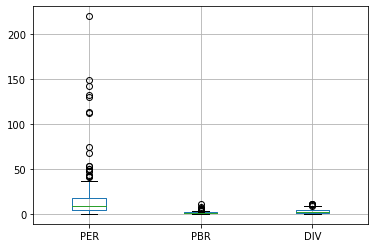

In [40]:
df_kospi_div_sorted.boxplot(column=['PER', 'PBR', 'DIV'])

In [43]:
df_kospi_div_top_100 = df_kospi_div_sorted.head(100)
df_kospi_div_top_100

,Name,BPS,PER,PBR,EPS,DIV,DPS
016360,삼성증권,68096.0,3.15,0.50,10810.0,11.18,3800.0
298020,효성티앤씨,329152.0,2.51,1.36,178503.0,11.15,50000.0
005940,NH투자증권,21630.0,3.08,0.44,3071.0,11.09,1050.0
071050,한국금융지주,126688.0,2.07,0.49,30208.0,9.82,6150.0
004800,효성,131860.0,3.17,0.53,22012.0,9.33,6500.0
...,...,...,...,...,...,...,...
051910,LG화학,278455.0,14.16,2.40,47108.0,1.80,12000.0
204320,HL만도,41672.0,12.74,1.09,3567.0,1.76,800.0
069960,현대백화점,202283.0,7.25,0.31,8652.0,1.75,1100.0
051900,LG생활건강,321556.0,13.81,2.16,50395.0,1.72,12000.0


In [24]:
# 배당금 상위 100개 기업 통계 
df_kospi_div_top_100.describe()

,BPS,PER,PBR,EPS,DIV,DPS
count,100.000000,100.000000,100.0000,100.000000,100.000000,100.000000
mean,110336.380000,18.508500,1.4755,12986.260000,3.233800,2741.060000
std,124143.055965,31.979364,1.6242,18519.449592,2.610881,3546.371108
min,0.000000,0.000000,0.0000,0.000000,0.080000,53.000000
25%,27003.250000,4.152500,0.5225,2790.500000,1.107500,642.500000
50%,64371.000000,7.970000,0.8650,5996.500000,2.605000,1462.500000
75%,136889.500000,16.372500,1.8900,13626.750000,4.692500,3025.000000
max,666803.000000,219.500000,10.6000,110854.000000,11.180000,20000.000000


<AxesSubplot:>

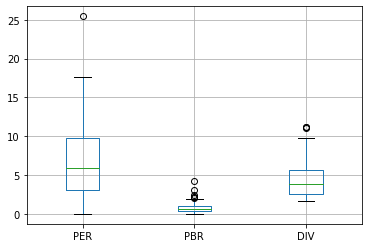

In [45]:
df_kospi_div_top_100.boxplot(column=['PER', 'PBR', 'DIV'])

In [48]:
df_kospi_div_top_100.to_excel('코스피_배당률_Top100-' + latest_date + '.xlsx')

In [26]:
# 배당금 상위 100개 기업 평균 데이터
df_kospi_div_top_100_mean = df_kospi_div_top_100.mean()
df_kospi_div_top_100_mean

C:\Users\shaws\AppData\Local\Temp\ipykernel_2628\1308683557.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_kospi_div_top_100_mean = df_kospi_div_top_100.mean()


BPS    110336.3800
PER        18.5085
PBR         1.4755
EPS     12986.2600
DIV         3.2338
DPS      2741.0600
dtype: float64

In [29]:
# 배당금 상위 100개 중 PER, PBR, DIV 기준 평균 초과 기업, 
df_kospi_div_top_100_over_mean = df_kospi_div_top_100[
                     (df_kospi_div_top_100['PER'] < df_kospi_div_top_100_mean['PER']) &
                     (df_kospi_div_top_100['PBR'] < df_kospi_div_top_100_mean['PBR']) &
                     (df_kospi_div_top_100['DIV'] > df_kospi_div_top_100_mean['DIV'])]
df_kospi_div_top_100_over_mean

,Name,BPS,PER,PBR,EPS,DIV,DPS
016360,삼성증권,68096.0,3.15,0.50,10810.0,11.18,3800.0
005940,NH투자증권,21630.0,3.08,0.44,3071.0,11.09,1050.0
071050,한국금융지주,126688.0,2.07,0.49,30208.0,9.82,6150.0
267250,HD현대,89404.0,0.00,0.68,0.0,9.16,5550.0
036460,한국가스공사,103337.0,2.91,0.31,11078.0,8.46,2728.0
138930,BNK금융지주,28745.0,2.93,0.24,2341.0,8.16,560.0
024110,기업은행,34345.0,3.51,0.29,2877.0,7.73,780.0
029780,삼성카드,70408.0,5.95,0.44,5164.0,7.48,2300.0
316140,우리금융지주,35494.0,3.57,0.35,3481.0,7.24,900.0
017670,SK텔레콤,53218.0,6.45,0.87,7191.0,7.11,3295.0


In [49]:
df_kospi_div_top_100_over_mean.to_excel('코스피_배당률_Top100_중_평균_초과_기업-' + latest_date + '.xlsx')

In [ ]:
"""
FIN
"""